In [1]:
import tensorflow as tf
from matplotlib import pyplot
import numpy as np
import os
import json

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory("data",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(50, 50),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 31759 files for training.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory("data",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(50, 50),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 7939 files for validation.


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [6]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(50,50,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomCrop(45, 45) #height, width
  ]
)

In [7]:
num_classes = 4
models = {}

In [8]:
models["CNN"] = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255, input_shape=(50, 50, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [9]:
models["MLP"] = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Flatten(input_shape=(50, 50, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
for model in models.values():
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
for model in models.values():
    model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 45, 45, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 45, 45, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 45, 45, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                  

In [12]:
epochs=100
histories = {}

In [13]:
for name in models:
    print("Training "+name)
    model_path = os.path.join("saved_models/", name+".h5")
    history_path = os.path.join("saved_histories", name+".json")
    histories[name] = models[name].fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs,
    )
    models[name].save(model_path)
    json.dump(histories[name].history, open(history_path, 'w'))

Training CNN
Epoch 1/100
993/993 [==============================] - 20s 10ms/step - loss: 0.9599 - accuracy: 0.5542 - val_loss: 0.7464 - val_accuracy: 0.6830
Epoch 2/100
993/993 [==============================] - 8s 8ms/step - loss: 0.6763 - accuracy: 0.7198 - val_loss: 0.6000 - val_accuracy: 0.7546
Epoch 3/100
993/993 [==============================] - 7s 7ms/step - loss: 0.5797 - accuracy: 0.7684 - val_loss: 0.5047 - val_accuracy: 0.8043
Epoch 4/100
993/993 [==============================] - 8s 8ms/step - loss: 0.5201 - accuracy: 0.7955 - val_loss: 0.4676 - val_accuracy: 0.8167
Epoch 5/100
993/993 [==============================] - 7s 7ms/step - loss: 0.4735 - accuracy: 0.8171 - val_loss: 0.4313 - val_accuracy: 0.8390
Epoch 6/100
993/993 [==============================] - 7s 7ms/step - loss: 0.4480 - accuracy: 0.8264 - val_loss: 0.4204 - val_accuracy: 0.8403
Epoch 7/100
993/993 [==============================] - 7s 7ms/step - loss: 0.4256 - accuracy: 0.8352 - val_loss: 0.3899 - val_a

Epoch 58/100
993/993 [==============================] - 7s 7ms/step - loss: 0.2454 - accuracy: 0.9059 - val_loss: 0.3040 - val_accuracy: 0.8983
Epoch 59/100
993/993 [==============================] - 7s 7ms/step - loss: 0.2511 - accuracy: 0.9061 - val_loss: 0.2996 - val_accuracy: 0.9009
Epoch 60/100
993/993 [==============================] - 7s 7ms/step - loss: 0.2483 - accuracy: 0.9054 - val_loss: 0.3055 - val_accuracy: 0.8951
Epoch 61/100
993/993 [==============================] - 7s 7ms/step - loss: 0.2415 - accuracy: 0.9082 - val_loss: 0.2999 - val_accuracy: 0.9015
Epoch 62/100
993/993 [==============================] - 8s 8ms/step - loss: 0.2457 - accuracy: 0.9078 - val_loss: 0.2999 - val_accuracy: 0.9000
Epoch 63/100
993/993 [==============================] - 7s 7ms/step - loss: 0.2430 - accuracy: 0.9102 - val_loss: 0.3086 - val_accuracy: 0.8967
Epoch 64/100
993/993 [==============================] - 7s 7ms/step - loss: 0.2385 - accuracy: 0.9099 - val_loss: 0.3125 - val_accuracy:

Epoch 15/100
993/993 [==============================] - 5s 6ms/step - loss: 1.2729 - accuracy: 0.3658 - val_loss: 1.2269 - val_accuracy: 0.3516
Epoch 16/100
993/993 [==============================] - 5s 5ms/step - loss: 1.2890 - accuracy: 0.3550 - val_loss: 1.4219 - val_accuracy: 0.2430
Epoch 17/100
993/993 [==============================] - 5s 5ms/step - loss: 1.3656 - accuracy: 0.2831 - val_loss: 1.3789 - val_accuracy: 0.2515
Epoch 18/100
993/993 [==============================] - 5s 5ms/step - loss: 1.3410 - accuracy: 0.3093 - val_loss: 1.3349 - val_accuracy: 0.3065
Epoch 19/100
993/993 [==============================] - 6s 6ms/step - loss: 1.3749 - accuracy: 0.2692 - val_loss: 1.3837 - val_accuracy: 0.2466
Epoch 20/100
993/993 [==============================] - 6s 6ms/step - loss: 1.3862 - accuracy: 0.2518 - val_loss: 1.3866 - val_accuracy: 0.2423
Epoch 21/100
993/993 [==============================] - 5s 5ms/step - loss: 1.3942 - accuracy: 0.2499 - val_loss: 1.3864 - val_accuracy:

Epoch 72/100
993/993 [==============================] - 5s 5ms/step - loss: 1.3863 - accuracy: 0.2528 - val_loss: 1.3863 - val_accuracy: 0.2539
Epoch 73/100
993/993 [==============================] - 6s 6ms/step - loss: 1.3864 - accuracy: 0.2470 - val_loss: 1.3864 - val_accuracy: 0.2470
Epoch 74/100
993/993 [==============================] - 5s 6ms/step - loss: 1.3864 - accuracy: 0.2489 - val_loss: 1.3864 - val_accuracy: 0.2568
Epoch 75/100
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2499 - val_loss: 1.3866 - val_accuracy: 0.2422
Epoch 76/100
993/993 [==============================] - 6s 6ms/step - loss: 1.3864 - accuracy: 0.2509 - val_loss: 1.3864 - val_accuracy: 0.2422
Epoch 77/100
993/993 [==============================] - 5s 6ms/step - loss: 1.3864 - accuracy: 0.2501 - val_loss: 1.3863 - val_accuracy: 0.2470
Epoch 78/100
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2515 - val_loss: 1.3866 - val_accuracy:

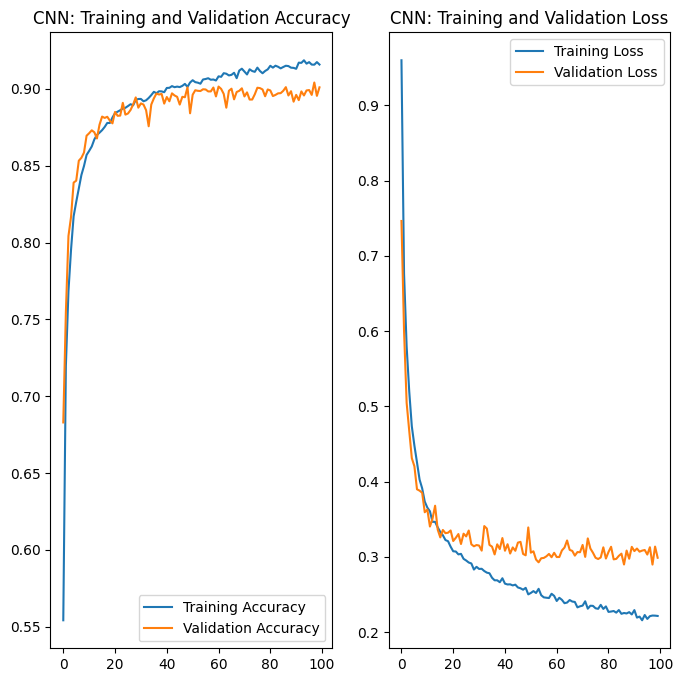

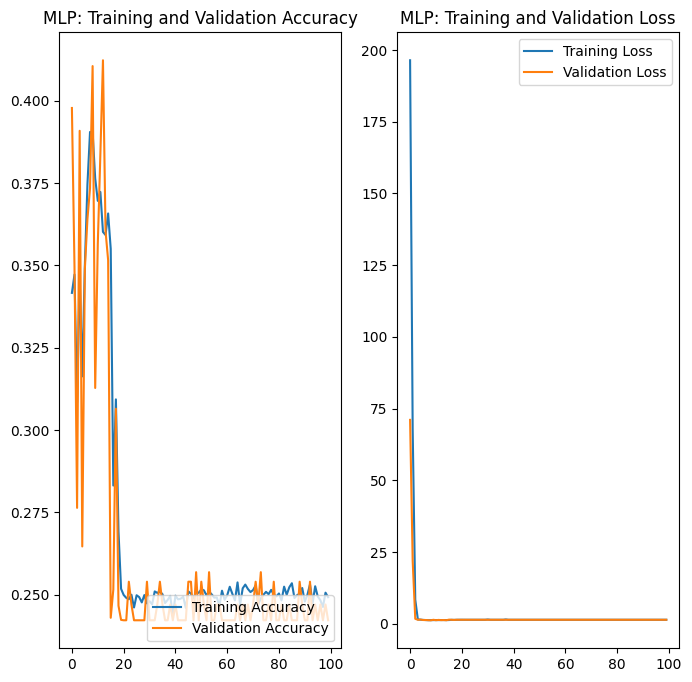

In [14]:
for name in histories:
    history = histories[name]
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    pyplot.figure(figsize=(8, 8))
    pyplot.subplot(1, 2, 1)
    pyplot.plot(epochs_range, acc, label='Training Accuracy')
    pyplot.plot(epochs_range, val_acc, label='Validation Accuracy')
    pyplot.legend(loc='lower right')
    pyplot.title(name+': Training and Validation Accuracy')

    pyplot.subplot(1, 2, 2)
    pyplot.plot(epochs_range, loss, label='Training Loss')
    pyplot.plot(epochs_range, val_loss, label='Validation Loss')
    pyplot.legend(loc='upper right')
    pyplot.title(name+': Training and Validation Loss')
    pyplot.show()

In [15]:
class_names = ["Access Granted","Access Denied - Please wear a mask over your nose.", "Access Denied - Please wear a mask over your mouth and nose.","Access Denied - Please wear a mask"]

In [16]:
def predict(file_path):
    
    img = tf.keras.utils.load_img(file_path, target_size=(50, 50))
    pyplot.imshow(img)

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    for name in models:
        model = models[name]
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])


        print(
            "{} predicts {} ({:.2f}% confidence)"
            .format(name, class_names[np.argmax(score)], 100 * np.max(score))
        )
    pyplot.show()
        


CNN predicts Access Denied - Please wear a mask (60.99% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


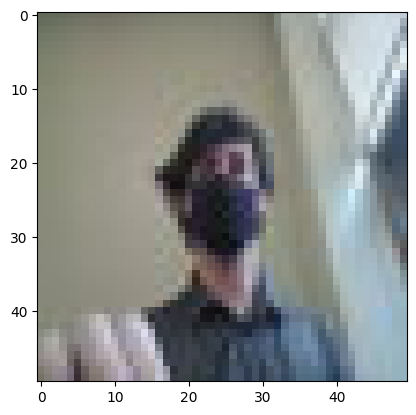

In [17]:
predict("faces/benjamin/1.jpg")

CNN predicts Access Denied - Please wear a mask (67.31% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


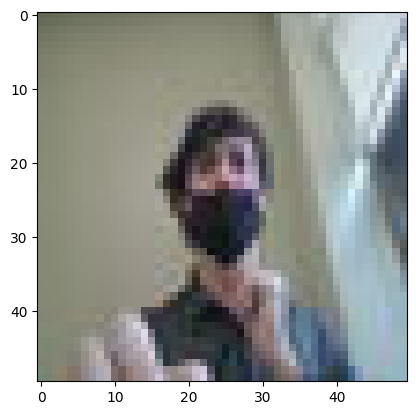

In [18]:
predict("faces/benjamin/2.jpg")

CNN predicts Access Denied - Please wear a mask (79.87% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


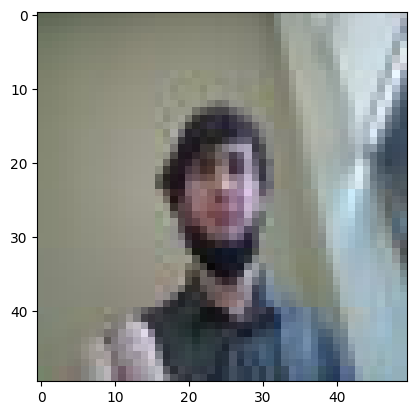

In [19]:
predict("faces/benjamin/3.jpg")

CNN predicts Access Denied - Please wear a mask (62.74% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


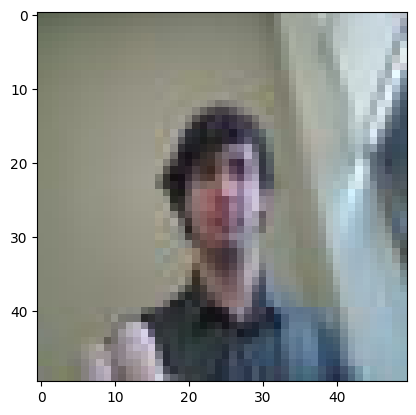

In [20]:
predict("faces/benjamin/4.jpg")

CNN predicts Access Granted (99.86% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


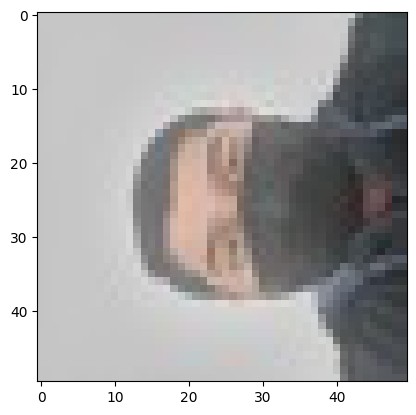

In [21]:
predict("faces/shaurya/1.jpg")

CNN predicts Access Denied - Please wear a mask over your nose. (99.98% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


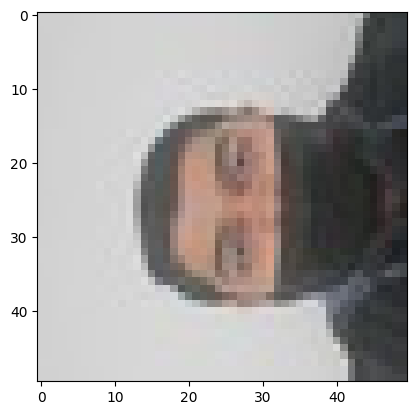

In [22]:
predict("faces/shaurya/2.jpg")

CNN predicts Access Denied - Please wear a mask over your mouth and nose. (94.09% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


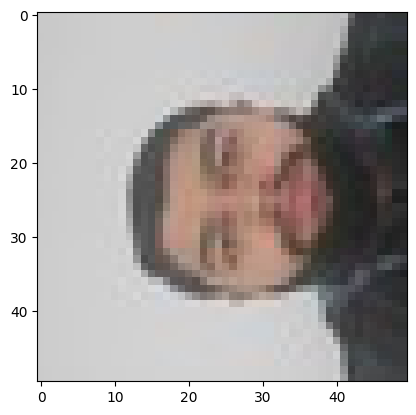

In [23]:
predict("faces/shaurya/3.jpg")

CNN predicts Access Denied - Please wear a mask over your mouth and nose. (63.38% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


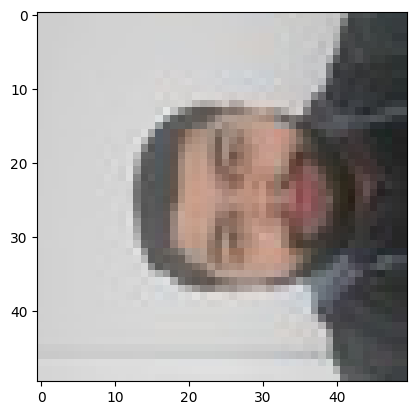

In [24]:
predict("faces/shaurya/4.jpg")

CNN predicts Access Granted (99.56% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


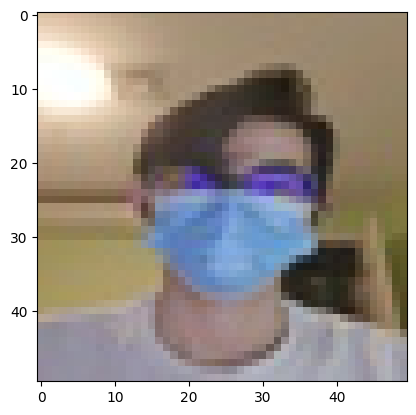

In [25]:
predict("faces/zunyi/1.jpg")

CNN predicts Access Denied - Please wear a mask over your nose. (96.73% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


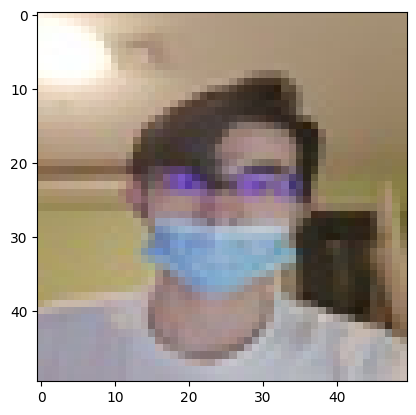

In [26]:
predict("faces/zunyi/2.jpg")

CNN predicts Access Denied - Please wear a mask over your mouth and nose. (100.00% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


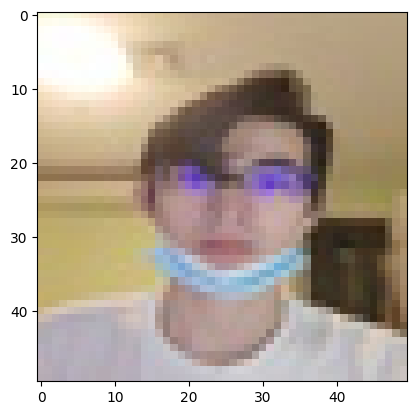

In [27]:
predict("faces/zunyi/3.jpg")

CNN predicts Access Denied - Please wear a mask (98.29% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


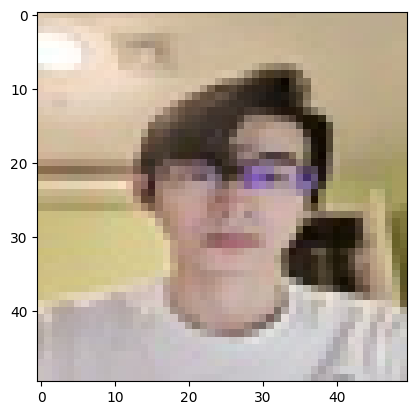

In [28]:
predict("faces/zunyi/4.jpg")

CNN predicts Access Denied - Please wear a mask (71.00% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


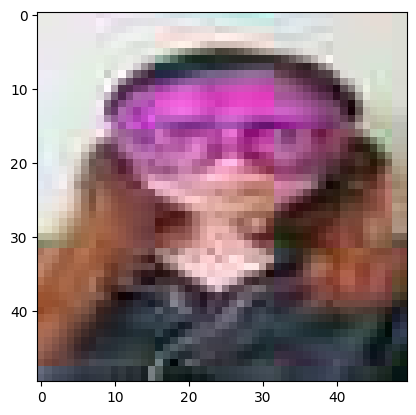

In [29]:
predict("faces/parisa/1.jpg")

CNN predicts Access Denied - Please wear a mask (98.00% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


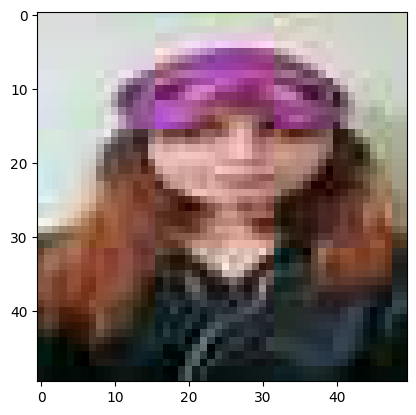

In [30]:
predict("faces/parisa/2.jpg")

CNN predicts Access Denied - Please wear a mask over your nose. (60.63% confidence)
MLP predicts Access Denied - Please wear a mask (25.17% confidence)


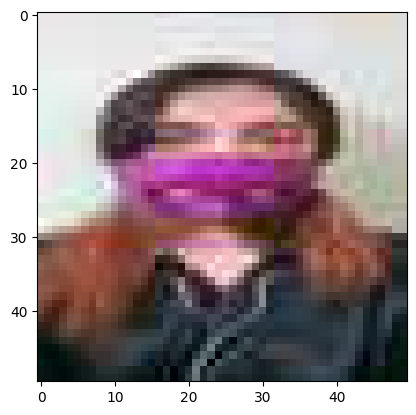

In [31]:
predict("faces/parisa/3.jpg")

## Source: https://www.tensorflow.org/tutorials/images/classification